In [8]:
@everywhere include("research_variable_flap.jl")
@pyimport matplotlib2tikz as mpl

In [2]:
N = 30
data = NewData(N)
computeA_parallel()
computeF(data);
@save "data/D$N.jld2" data

          |------------------------------|
Processing|******************************|9.84228754 sec(avg 0.3280762513333333 sec)


In [3]:
N = 40
data = NewData(N)
computeA_parallel()
computeF(data);
@save "data/D$N.jld2" data

          |------------------------------|
Processing|******************************|20.698462894 sec(avg 0.6899487631333333 sec)


In [4]:
N = 60
data = NewData(N)
computeA_parallel()
computeF(data);
@save "data/D$N.jld2" data

          |------------------------------|
Processing|******************************|93.041012591 sec(avg 3.1013670863666665 sec)


In [5]:
N = 80
data = NewData(N)
computeA_parallel()
computeF(data);
@save "data/D$N.jld2" data

          |------------------------------|
Processing|******************************|279.994959623 sec(avg 9.333165320766666 sec)


In [6]:
N = 100
data = NewData(N)
computeA_parallel()
computeF(data);
@save "data/D$N.jld2" data

          |------------------------------|
Processing|******************************|681.619884668 sec(avg 22.720662822266668 sec)


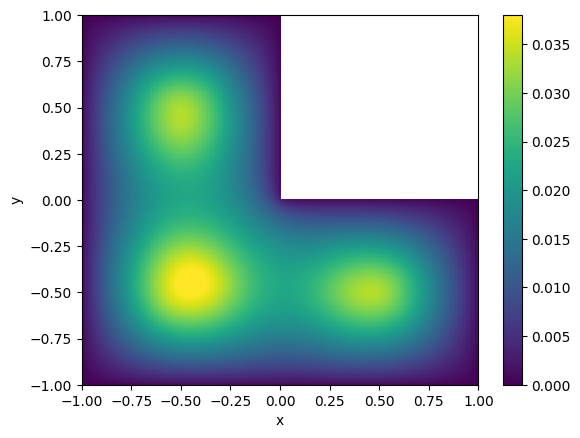

 81.264449 seconds (3.89 M allocations: 7.067 GiB, 1.19% gc time)


PyObject Text(24.0, 0.5, 'y')

In [7]:
@time u = data.A\data.F;
showsol(u, data.loc)

In [24]:
NN = 100
x = LinRange(-1,1,NN)
Xs = zeros(NN,NN)
Ys = zeros(NN,NN)
for i = 1:NN
    for j = 1:NN
        Xs[i,j] = x[i]
        Ys[i,j] = x[j]
    end
end

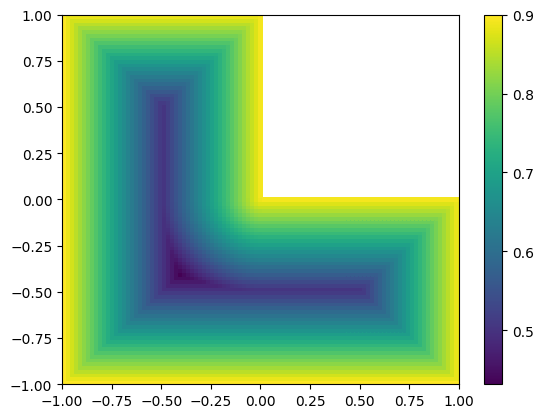

In [31]:
Zs = zeros(NN, NN)
for i = 1:NN
    for j = 1:NN
        Zs[i,j] = sfunc([Xs[i,j];Ys[i,j]])
    end
end
pcolor(Xs, Ys, Zs)
colorbar()
savefig("latex/figures/s.eps")

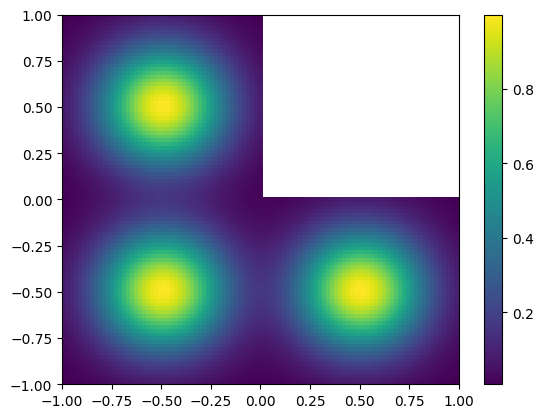

In [30]:
Zs = zeros(NN, NN)
for i = 1:NN
    for j = 1:NN
        if Xs[i,j]>0 && Ys[i,j]>0
            Zs[i,j] = NaN
        else
            Zs[i,j] = fsrc([Xs[i,j];Ys[i,j]])
        end
    end
end
pcolor(Xs, Ys, Zs)
colorbar()
savefig("latex/figures/f.eps")